# Part I - Prosper Loan Dataset exploration
## by Tlotliso Molapo

## Introduction

The dataset consists of loan data from Prosper. The datasets consists of 113,937 loans with 81 variables from loans approved by Prosper.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#saving csv to dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#inspecting the number of rows and columns in the database
df.shape

(113937, 81)

The data set has 113,937 rows and 81 columns.

In [4]:
#High detail exploration of the data
print(df.shape)
print(df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

The dataset has 81 variables, which are include floats, integers, strings and booleans. The dataset also includes the loan credit ratings, the original loan amount, the loan status and other factors such as the income range of the borrowers.

In [5]:
#inspecting the number of customers that own homes
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

The  number of borrowers who own a home is 57,478 and 56,459 is the number of borrowers who do not own a home. There isn't a large difference between the two.

In [7]:
#inspecting the income range of customers
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

The income category with the most loans is 25,000 - 49,999 and the income category following that is 
50,000 - 74,999. The income category with the least borrowers is 0.

In [39]:
#looking at summary statistics for Mothly Loan payment
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

The average monthly payment made by borrowers is 272, while the minimum is 0.

I will be converting the Income ranges datatype into a category to facilitate easier use of the datatype when plotting graphs.

In [50]:
#creating income ranges into a category datatype
IncomeRange_ranges = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed'
                      ]

In [51]:
Income_range = pd.api.types.CategoricalDtype(ordered=True, categories=IncomeRange_ranges)

In [52]:
df['IncomeRange'] = df['IncomeRange'].astype(Income_range)

In [53]:
#testing the datatype
df['IncomeRange'].dtype

CategoricalDtype(categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                  '$50,000-74,999', '$100,000+', '$75,000-99,999',
                  'Not displayed'],
, ordered=True)

In [54]:
#inspecting count of each credit rating
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

I will be converting the Credit Grade datatype into a category to facilitate easier use of the datatype when plotting graphs.

In [138]:
#creating Credit grade into a category datatype
CreditGrade_grades = ['AA','A','B','C','D','E','HR','NC']

In [139]:
C_grades = pd.api.types.CategoricalDtype(ordered=True, categories=CreditGrade_grades)

In [140]:
df['CreditGrade'] = df['CreditGrade'].astype(C_grades)

In [141]:
df.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

In [59]:
#inspecting summary statistics for Debt to income ratio
df.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

After inspecting the debt to income ratio the mean debt to income ration is 0.27 and upper quartile in 0.32

In [18]:
#Inspecting categories for loan status
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

The category with the most amount of loan is completed with 56,576 with the category with the least amount of loans being cancelled.

In [19]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

The mean amount lent to borrowers is 8,337 with the minimum being 1000 and the maximum to being 35,000.

### What is the structure of your dataset?
There are 113 936 rows in the datset with 81 columns

- Prosper risk score which goes from 1 ----> 10. 10 being the best score, 1 being the lowest.
- Income range which is in categorical categories ranges of 25,000 dollars starting from 0 to 100,000+ dollars
- Is Borrower a home owner, showing it is true and false.
- Loan Status, showing the status of the loans if they are current, completed, defaulted or Past Due.
- Borrower Rate - showing the borrowers interest
- Total Debto to Income ratio which shows the income ratio the time the credit profile was pulled



### What is/are the main feature(s) of interest in your dataset?

1. Loan Status
2. Original Loan Amount


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Is the borrower a Home Owner
2. Credit Grade
3. Income Categories
4. Monthly loan payments
5. Debt to Income Ratio

## Univariate Exploration

### Distribution of loans approved

I will be looking at the following question:

What is the distribution of loans that are approved?

In order to answer this question I will be using a histogram to see the distribution of loans.

In [34]:
#splitting the histogram into bins
bin_loan = np.arange(1000,35000+1000,5000)

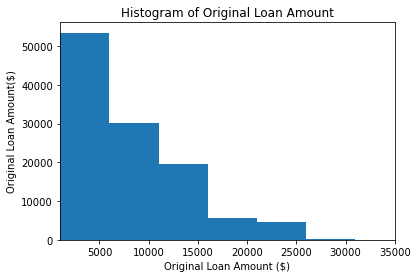

In [40]:
#plotting histogram
plt.hist(df['LoanOriginalAmount'],bins=bin_loan);
plt.xlim(1000,35000)
plt.title("Histogram of Original Loan Amount")
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Original Loan Amount($)');

From my observation the Loan Amount is skewed towards the left, with most loans being between 5000 and 15,000 there are outliers towards 35,000.

### Distribution of Monthly payments

(0.0, 2500.0)

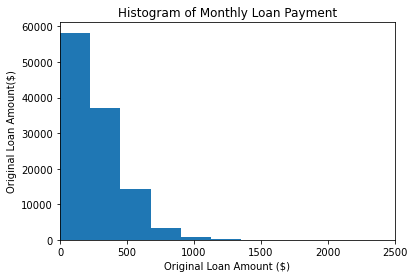

In [143]:
#bin_pay = np.arange(0,2500+100,100)
plt.hist(df['MonthlyLoanPayment']);
plt.title("Histogram of Monthly Loan Payment")
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Original Loan Amount($)')
plt.xlim(0,2500)


Monthly payments are skewed to the lef with the majority of payments falling between 0 and 500.

### Income Ranges with the most loans approved

I will be looking at the following question:

Which income ranges have the most amount of loans approved.

In order to answer this question I will be utilizing a countplot.

In [21]:
#creating function to plot count graphs for categorical data
def count_graph (dataframe,column,chart_title,x_axis_label,xrotation):
    fig = plt.figure()
    ax = fig.add_axes([.125, .125, .775, .755])
    base_color = sb.color_palette()[0]
    sb.countplot(data = dataframe, x = column, color = base_color, ax = ax)
    plt.title(chart_title)
    plt.xticks(rotation=xrotation)
    plt.xlabel(x_axis_label);

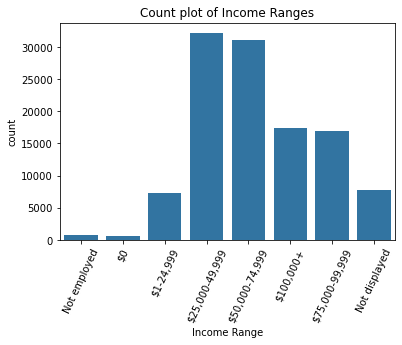

In [72]:
count_graph(df,'IncomeRange','Count plot of Income Ranges','Income Range',65)

As per my observation, the income ranges who have the most amount of loans are as follows in order of highest to lowest:

- 25,000 - 49,999
- 50,000 - 74,999
- 100,000+
- 75,000 - 99,999
- Not displayed
- 1 - 24,999
- Not employed
- 0

### Credit Grade

I will be answering the following question which credit grades have the most amount of loans on prosper.

Prosper credit ratings are organized alphabetically and indicate the risk of the customer, with A being the least risky and HR being the riskiest.

To answer this quesion I i will be utilizing a countplot.

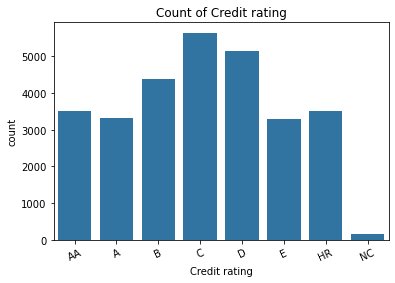

In [73]:
#inspecting customers credit rating using a count plot
count_graph(df,'CreditGrade','Count of Credit rating','Credit rating',25)

Per my observation the credit ratings with the most borrowers can be organized as follows, from highest to lowest

- C
- D
- B
- AA
- HR
- E
- NC

### Is the Borrower a home owner?

I will be investigating the following question:

Do home owners have more loans on prosper or do non-home owners have more loans?

In order to answer this question I will be using a countplot.

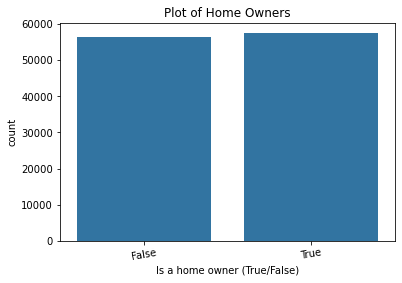

In [25]:
count_graph(df,'IsBorrowerHomeowner','Plot of Home Owners','Is a home owner (True/False)',10)

Per my observation the amount of loans are round about equal with Home owners have as much loans as non home owners.

## Bivariate Exploration

### Relationship between Credit Grade and Original Loan Amount

I will be looking at the following question.

What is the relationship between the Original Loan amount and the different credit grades.

To answer this question I will be utilizing a violin plot and box plot.

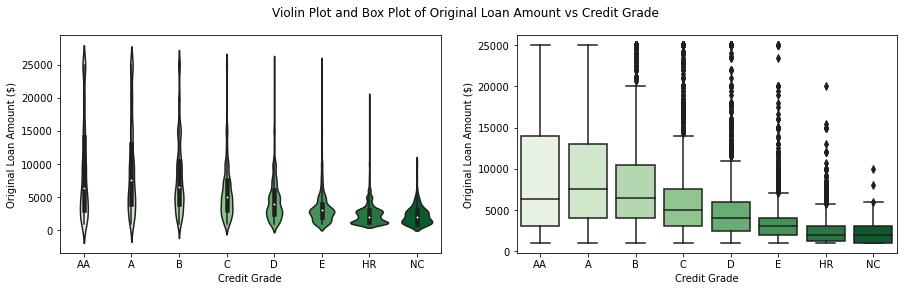

In [102]:
#inspecting the relationship between credit grade and Original loan amount
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Violin Plot and Box Plot of Original Loan Amount vs Credit Grade')

aa = sb.violinplot(ax=axes[0], data=df, x='CreditGrade',y='LoanOriginalAmount',palette='Greens')
ab = sb.boxplot(ax=axes[1], data=df, x='CreditGrade',y='LoanOriginalAmount', palette='Greens')
aa.set_xlabel('Credit Grade')
aa.set_ylabel('Original Loan Amount ($)')
ab.set_xlabel('Credit Grade')
ab.set_ylabel('Original Loan Amount ($)');

The credit rating with the largest interquartlile range is AA, which has a higher upper quartile than the other ranges. 

B , C, D, E, HR and NC ratings have outliers with regards to the amounts that were approved originally with B having outliers going from 20,000 to 25,000. 

E has outliers range from 6500 to about 25000

All the ratings are skewed to the left, with a large distribution of the loans being amount of betweeen o and 6000.

### Relationship between Home ownership and Income range

I will be answering the following questions.

Does income category have any relationship with home ownership?

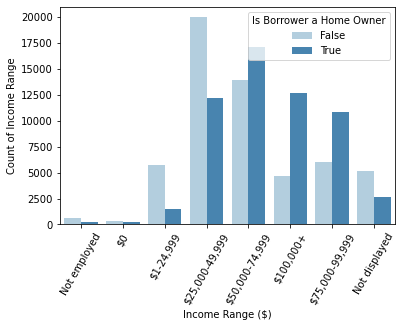

In [150]:
#inspecting the relationsip between Income range and owning a home
income_plot = sb.countplot(data = df, x='IncomeRange', hue='IsBorrowerHomeowner',palette = 'Blues')
plt.legend(title='Is Borrower a Home Owner')
plt.xlabel('Income Range ($)')
plt.ylabel('Count of Income Range')
plt.xticks(rotation=60);

From my obsrvations the higher income categories have more owners in the specific categories than non home owners.

- +100,000 category has more home owenrs than non home owners
- 75,000 - 99,999 category has more home owners than non home owners
- 50,000 - 74,999 has more home owners than non home owners
- 25,000 - 49,999 category has more non home owners than home owners, all other categories also have more non-home owners than home owners

### Relationship between Loan defaults, completed loans and Income ranges

I will be answering the following question

What is the relationship between defaults and income categories?

To anser this question I will be using a bivariate countplot.

In [61]:
#querying database for customers who have defaulted
df_defaulted = df.query("LoanStatus == 'Defaulted' or LoanStatus == 'Completed'")

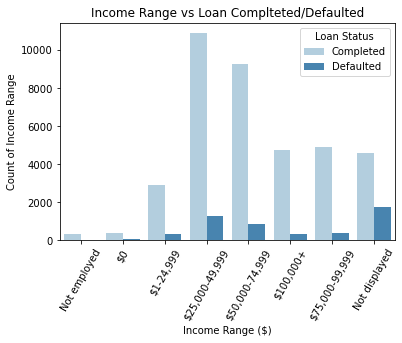

In [161]:
#inspecting the relationsip between the customers who have defaulted and their income range
income_plot = sb.countplot(data = df_defaulted, x='IncomeRange', hue='LoanStatus' ,palette = 'Blues')
plt.legend(title='Loan Status')
plt.xlabel('Income Range ($)')
plt.ylabel('Count of Income Range')
plt.title('Income Range vs Loan Complteted/Defaulted')
plt.xticks(rotation=60);

From my observations defaults constitue a small number of the population for each income category, when observed against the number of loans that have been completed.

### Relationship between Loan defaults, completed loans and Credit Grade

I will be answering the following question:

What is the relationship between credit grades and whether a loan is completed or defaulted?

To answer this question I will be using a bivariate count plot.

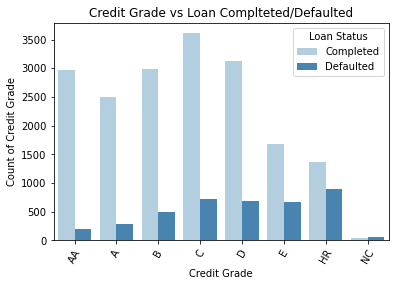

In [162]:
#inspecting the relationsip between the customers who have defaulted and their Credit Grade
income_plot = sb.countplot(data = df_defaulted, x='CreditGrade', hue='LoanStatus', palette = 'Blues')
plt.legend(title='Loan Status')
plt.xlabel('Credit Grade')
plt.ylabel('Count of Credit Grade')
plt.title('Credit Grade vs Loan Complteted/Defaulted')
plt.xticks(rotation=60);

From my observation defaults are higher in the lowest credit rating with HR having the highest amount of defaults and AA having the lowest amount of defaults.

Th proportion between completed loans and defaults is also higher in the best credit rating AA.

### Relationship between Loan defaults, completed loans and whether the customer is a home owner

I will be looking at the following question:

Is there a relationship between whether loans are completed/defaulted and whether the borrower is a home owner?

To do this I will be utilizing a bivariate countplot.

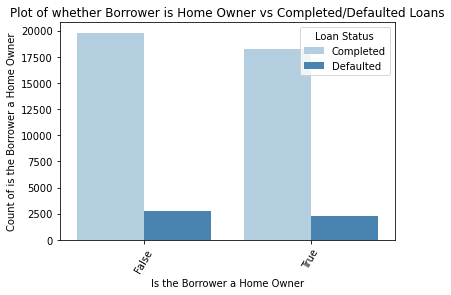

In [160]:
#inspecting the relationsip between the customers who have defaulted and their whether they own a Home
income_plot = sb.countplot(data = df_defaulted, x='IsBorrowerHomeowner', hue='LoanStatus' , palette = 'Blues')
plt.xticks(rotation=60)
plt.title('Plot of whether Borrower is Home Owner vs Completed/Defaulted Loans')
plt.legend(title='Loan Status')
plt.xlabel('Is the Borrower a Home Owner')
plt.ylabel('Count of is the Borrower a Home Owner');

The distrubtion between completed loans and defaulted loans, looks similar for home owners and non home owners with the plots being identical.

### Relationship between Credit Grade and whether the customer is a home owner

I will be answering the following question:

Is there a relationship between whether the customer is a home owner and the credit grade?

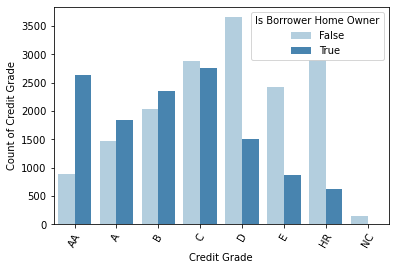

In [116]:
income_plot = sb.countplot(data = df, x='CreditGrade'
                           , hue='IsBorrowerHomeowner' ,palette = 'Blues')
plt.xticks(rotation=60)
plt.xlabel('Credit Grade')
plt.ylabel('Count of Credit Grade')
plt.legend(title='Is Borrower Home Owner');

### Relationship between, Loan complteted/defaulted  and Original Loan Amount

I will be answering the following quesstion:

What is the impact of the loan amount on whether the loan is completed or defaulted?

To do this I will be utilizing a bivariate violin plot and a bivariate box plot.

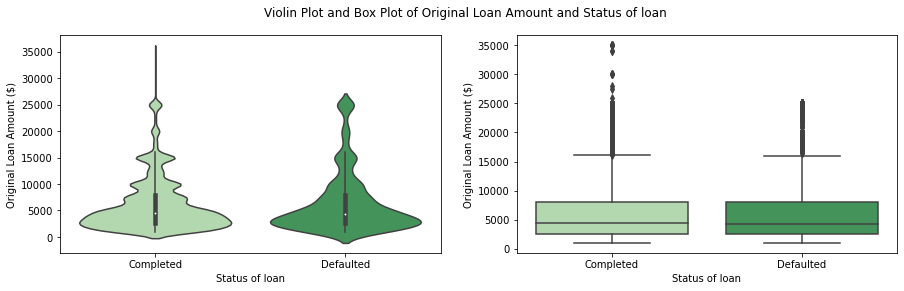

In [94]:
#inspecting the relationship between credit grade and Original loan amount
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Violin Plot and Box Plot of Original Loan Amount and Status of loan')

aa = sb.violinplot(ax=axes[0], data=df_defaulted, x='LoanStatus',y='LoanOriginalAmount',palette = 'Greens')
ab = sb.boxplot(ax=axes[1], data=df_defaulted, x='LoanStatus',y='LoanOriginalAmount' ,palette = 'Greens')
aa.set_xlabel('Status of loan')
aa.set_ylabel('Original Loan Amount ($)')
ab.set_xlabel('Status of loan')
ab.set_ylabel('Original Loan Amount ($)');

From my observation, the completed loans are skewed to the left, with the higher amount of loans being between 0 and 6,000.

This is the same for the distribution for defaulted loans. With both completed and defaulted loans have outlier loan amounts from 18,000. Whilst the outlier for completed loans goes up to 35,000 the outlier for defaulted loans is up to 25,000

The median for defaulted and completed loans is about 5000.


### Relationships between features of interest

I observed the following in the feature of interest:

- The loan amount is skewed to the left with most loans being of amount 5000 to 15,000
- Defaults represent a small number of the population for each income category, when observed against the number of loans that have been completed.
- Defaults are higher in the lowest credit rating with HR having the highest amount of defaults and AA having the lowest amount of defaults.
- The credit rating with the highest interquartile range is AA with respect to the original loan amount. All the credit ratings are skewed to the left with respect to the original loan amount.

### Relationships between other features

I have observed the following in the other features:

- The income range with the most loans is 25,000 - 49,999.
- The credit rating with the most loans is C.
- The distribution between number of borrowers with a house and those without is about 50/50 with about 50% having a house and 50% not having a house
- +100,000 category has more home owenrs than non home owners. 75,000 - 99,999 category has more home owners than non home owners .50,000 - 74,999 has more home owners than non home owners .25,000 - 49,999 category has more non home owners than home owners, all other categories also have more non-home owners than home owners.

## Multivariate Exploration

### Relationship between Orignal Loan Amount, Loan Status and Credit Grade/ Income Range

I will be answering the following question:

What is the relationship between the Loan Status (Completed or Defaulted), the original loan amount and the categories Income Range and Credit Grade.

To do this I will plot a multivariate barplot.

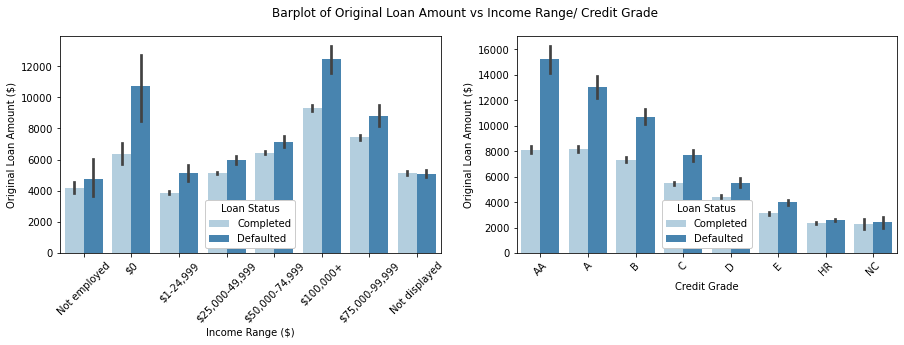

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Barplot of Original Loan Amount vs Income Range/ Credit Grade')


bar = sb.barplot(ax = axes[0], data = df_defaulted, x='IncomeRange',y='LoanOriginalAmount', hue='LoanStatus',palette='Blues')
bar.legend(loc=8, ncol=3, framealpha=1, title='Loan Status')
plt.xticks(rotation=60);

bar_2 = sb.barplot(ax= axes[1], data = df_defaulted, x='CreditGrade',y='LoanOriginalAmount', hue='LoanStatus', palette='Blues')
bar.legend(loc=8, ncol=3, framealpha=1, title='Loan Status')
bar.set(xlabel="Income Range ($)", ylabel ='Original Loan Amount ($)')
bar_2.set(xlabel="Credit Grade", ylabel ='Original Loan Amount ($)')
bar.legend(loc=8, ncol=1, framealpha=1, title='Loan Status')
bar_2.legend(loc=8, ncol=1, framealpha=1, title='Loan Status')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45);

From my observation - the loan defaults have higher mean Original Loan amounts, whether it be for Income Categories or Credit ratings.

Borrowers with higher mean Original loan amounts default on their loans for each income category and credit risk rating.

### Relationship between Debt Income Ration, Loan Status and Credit Grade/ Income Range

I will be answering the following question:

What is the relationship between the Loan Status (Completed or Defaulted), the Debt to Income Ration and the categories Income Range and Credit Grade.

To do this I will plot a multivariate barplot.

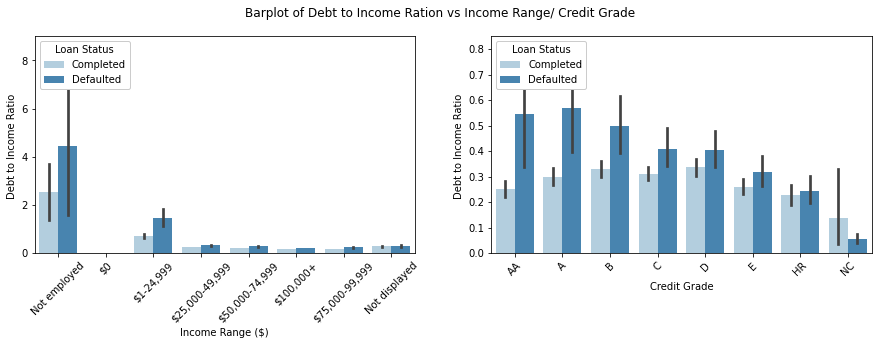

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Barplot of Debt to Income Ration vs Income Range/ Credit Grade')


bar = sb.barplot(ax = axes[0], data = df_defaulted, x='IncomeRange',y='DebtToIncomeRatio', hue='LoanStatus',palette='Blues')
bar.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')
bar.set(xlabel="Income Range ($)", ylabel ='Debt to Income Ratio ')



bar = sb.barplot(ax= axes[1], data = df_defaulted, x='CreditGrade',y='DebtToIncomeRatio', hue='LoanStatus',palette='Blues')
bar.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')
bar.set(xlabel="Credit Grade", ylabel ='Debt to Income Ratio ')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45);

From my observation - the loan defaults have higher mean total debt to income ratio's, whether it be for Income Categories or Credit ratings.

Borrowers with higher total debt to income ratios default on their loans for each income category and credit risk rating.

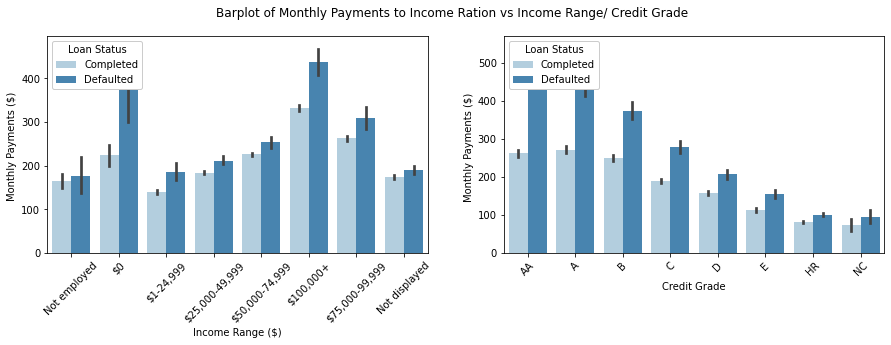

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(15,4))
fig.suptitle('Barplot of Monthly Payments to Income Ration vs Income Range/ Credit Grade')


bar = sb.barplot(ax = axes[0], data = df_defaulted, x='IncomeRange',y='MonthlyLoanPayment', hue='LoanStatus',palette='Blues')
bar.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')
bar.set(xlabel="Income Range ($)", ylabel ='Monthly Payments ($) ')



bar = sb.barplot(ax= axes[1], data = df_defaulted, x='CreditGrade',y='MonthlyLoanPayment', hue='LoanStatus',palette='Blues')
bar.legend(loc=2, ncol=1, framealpha=1, title='Loan Status')
bar.set(xlabel="Credit Grade", ylabel ='Monthly Payments ($)  ')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45);

From my observation - the loan defaults have higher mean monthly payments, whether it be for Income Categories or Credit ratings.

Borrowers with higher monthly payments default on their loans for each income category and credit risk rating.

### Relationships observed with regards to features of interest.

For each income category and credit grade, the mean amount of the Original loan is higher for defaults than it is for completed loans.

### Interesting and surprising interactions between features.

For each income category and credit grade, the mean amount of the monthly payment is higher for defaults than it is for completed loans.

## Conclusions

In terms of the dataset, the main features of interest were selected from the dataset and explored using visualizations. From these visualization analysis was done, and bivariate and multivariate visualization were made from the initial feature used for univariate visualizaiton.

The following main observations were made with respect to the dataset:

- Defaults represent a small number of the population for each income category, when observed against the number of loans that have been completed.

- Defaults are higher in the lowest credit rating with HR having the highest amount of defaults and AA having the lowest amount of defaults.

- For each income category and credit grade, the mean amount of the Original loan is higher for defaults than it is for completed loans.

- For each income category and credit grade, the mean amount of the monthly payment is higher for defaults than it is for completed loans.